<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/MachinLearning/ML_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ML_day3 정리

데이터 종류  
정형 - 미리 정해진 형식, 틀에 저장되는 데이터(정수, 문자, 실수, 날짜시간 등)  
비정형 - (binary구성: 이미지, 동영상, 사운드), 텍스트 말뭉치   
반정형 - (데이터 + 메타정보)  

텍스트분석을 위한 처리 단계(텍스트 정규화):  
클렌징(str) > 대/소문자 변경(str) > 특수문자 삭제(nltk구두점삭제) > 토큰화 작업(word_tokenize/sentence_tokenize:   단어순서고려한 토큰화 방식: n-gram)  

의미 없는 단어 제거 작업(불용어 => Stop word) > 어근추출(Stemming: 원형단어로 변환) > 표제어 추출(Lemmdatization)   > 텍스트를 특성 벡터 변환(Count기반 Bag of Words, TF-IDF기반 벡터화)  > 피터 추출(특정 선택, 추출을 통한 자원 축소)

단어의 중의적인 문제를 해결하기 위해 품사 정보를 추가하는 작업(Tagging), 프로그램(Tagger)

이미지를 머신러닝 알고리즘으로 학습시키기 위해 수치 벡터로 변환하는 전처리 필요  
이미지 처리를 위한 오픈소스 컴퓨터비전 라이브러리 openCV  
openCV.imread() - 수치 벡터로 변환하는 전처리를 위해 이미지 로드  
컬러 이미지 로드  
cv2.IMREAD_COLOR(BGR)  
흑백 이미지 로드  
cv2.IMREAD_GRAYSCALE  

이미지 처리 후 확인 출력  
1. matplotlib.imshow(), matplotlib.show()
    matplotlib의 출력을 위한 컬러이미지 변환: cv2.cvtColor(변환이미지객체, cv2.COLOR_BGR2RGB)
2. cv2.imwrite(경로/이름.확장자, 이미지객체) : 이미지저장

이미지 크기 변경
1. cv2.resime(이미지객체, (width, height))
2. 수치벡터로 변환된 행렬을 slicing


### ML_day4 시작

• 이미지를 흐리게 하려면 각 픽셀을 주변 픽셀의 평균값으로 변환  
• 주변 픽셀에 수행되는 연산을 수학적으로 커널이라 표현  
• 커널의 크기는 흐림의 정도를 결정한다.   
• 커널이 클수록 이미지가 더 부드러워집니다. => 블러도 심해짐  
• 커널은 이미지를 선명하게 만드는 것부터 경계선 감지까지 이미지 처리 작업을 하는데 널리 사용

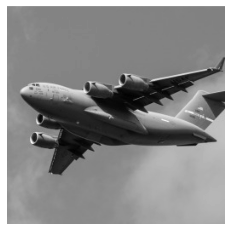

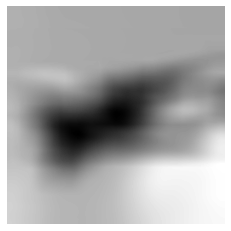

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
#각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 합니다. 
image_blurry = cv2.blur(image, (50,50))
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
plt.imshow(image_blurry, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

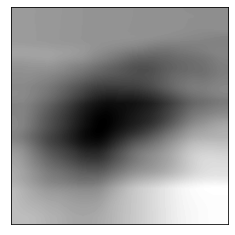

In [ ]:
# 커널 크기의 영향을 강조하기 위해 100X100 커널로 같은 이미지를 흐리게 합니다. 
image_very_blurry = cv2.blur(image, (100,100))
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지를 출력 
#plt.xticks([]), plt.yticks([]):축 값
plt.show()

커널 PCA  
서포트 벡터 머신 - 비선형 함수(커널)  
Meanshift알고리즘 - 샘플의 영향 범위(커널)  
신경망 - 가중치(커널)

이미지 투명도 처리  
• 커널 크기는 (너비, 높이)로 지정합니다.   
• blur 함수는 각 픽셀에 커널 개수의 역수를 곱하여 모두 더합니다. ( 이 값이 중앙 픽셀의 값이 됩니다.)   
• 흐림 처리에 사용한 커널  
• filter2D()의 두번째 매개변수는 픽셀값의 범위를 지정하는 것으로 -1이면 입력과 동일한 범위를 유지합니다  
• 가우시안 블러에 사용한 커널은 각 축 방향으로 가우시안 분포를 따르는 1차원 배열을 만든 다음 외적하여 생성합니다.

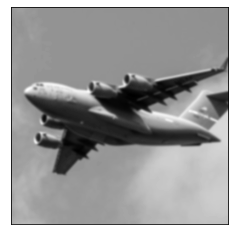

In [ ]:
kernel = np.ones((5,5)) /10 # 커널을 만듭니다. kernel # 커널을 확인
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show() 

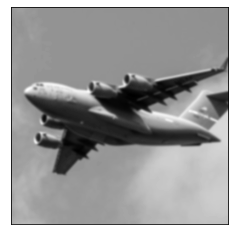

In [ ]:
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0)
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

이미지 투명도 처리  
• GaussianBlur() - 세번째 매개변수는 X축(너비) 방향의 표준편차입니다.   
• 0으로 지정하면 ((너비-1)*0.5-1)*0.3+0.8와 같이 계산합니다.   
• Y축 방향의 표준편차는 기본값이 0입니다  
• getGaussianKernel()를 사용하여 1차원 배열을 만들고 넘파이 outer 함수로 외적을 계산할 수 있습니다

In [ ]:
gaus_vector = cv2.getGaussianKernel(5, 0) #1차원에 해당하는 배열
gaus_vector

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

In [ ]:
gaus_kernel = np.outer(gaus_vector, gaus_vector) # 벡터를 외적하여 커널을 만든다. 
gaus_kernel

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

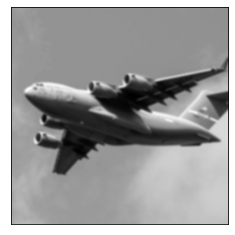

In [ ]:
# filter2D()로 커널을 이미지에 직접 적용하여 비슷한 흐림 효과를 만들 수 있다. 
image_kernel = cv2.filter2D(image, -1, gaus_kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

이미지 선명하게 하기  
• 대상 픽셀을 강조하는 커널을 만들고 filter2D를 사용하여 이미지에 커널을 적용합니다  
• 중앙 픽셀을 부각하는 커널을 만들면 이미지의 경계선에서 대비가 더욱 두드러지는 효과가 생깁니다

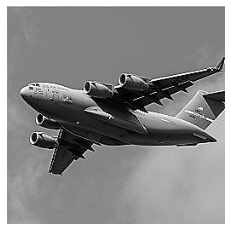

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
kernel = np.array([[0, -1, 0],
[-1, 5,-1],
[0, -1, 0]]) # 커널을 만듭니다. # 이미지를 선명하게 만듭니다. 
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

이미지 대비 높이기  
• 히스토그램 평활화   
    - 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구로서 관심 대상을 다른 객체나 배경과 잘 구분되도록 만들어줍니다  
    픽셀값의 범위가 커지도록 이미지를 변환합니다.   
• Y(휘도)는 루마(luma) 또는 밝기이고 U와 V는 컬러를 나타냅니다  
• 흑백 이미지에는 OpenCV의 equalizeHist()를 바로 적용할 수 있습니다.

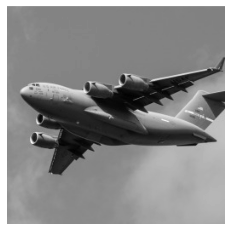

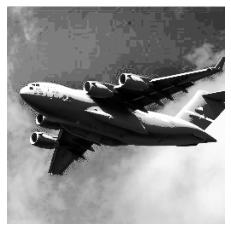

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

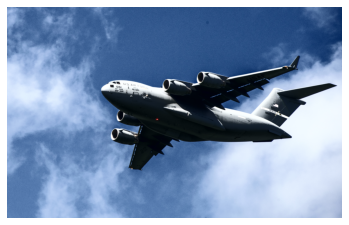

In [ ]:
image_bgr = cv2.imread("plane.jpg") # 이미지 로드
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경합니다. 
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다. 
plt.imshow(image_rgb), plt.axis("off") # 이미지 출력
plt.show()

색상 구분  
• 이미지에서 한 색상을 구분하려면 색 범위를 정의하고 이미지에 마스크를 적용합니다.   
• 이미지를 HSV(색상, 채도, 명도)로 변환 -> 격리시킬 값의 범위를 정의 -> 이미지에 적용할 마스크를 만듭니다.(마스크의 흰색 영역만 유지)   
• bitwise_and()는 마스크를 적용하고 원하는 포맷으로 변환

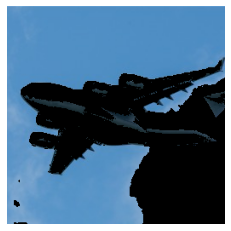

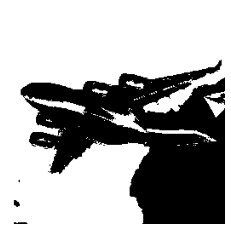

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread('plane_256x256.jpg') # 이미지 로드
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV) # BGR에서 HSV로 변환
lower_blue = np.array([50,100,50]) # HSV에서 파랑 값의 범위를 정의
upper_blue = np.array([130,255,255])
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) # 마스크를 만듭니다.(원본이미지에 맞는 마스크 생성 후 적용)
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask) # 이미지에 마스크를 적용
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변환
plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()
plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력 
plt.show()

이미지 이진화: 흰색, 검은색으로 이미지 변환하는 것  

• 이진화는 이미지 안의 영역 마다 빛 조건이 달라질 때 도움이 됩니다.   

• 이미지 이진화(임계처리) thresholding - 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고   
    작은 값을 가진 픽셀은 검은색으로 만드는 과정  

• 적응적 이진화(임계처리) adaptive thresholding - 픽셀의 임계값이 주변 픽셀의 강도에 의해 결정된다. 

• adaptiveThreshold() - max_output_value매개변수는 출력 픽셀 강도의 최대값을 결정  

• cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정  

• cv2.ADAPTIVE_THRESH_MEAN_C : 픽셀의 임계값을 주변 픽셀의 평균으로 설정  

• neighorhood_size : 블록 크기(픽셀의 임계값 결정에 사용되는 주변 영역 크기)   

• substract_from_mean : 계산된 임계값에서 뺄 상수(임계값을 수동으로 미세 조정하는 데 사용하는 값)

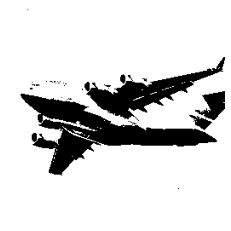

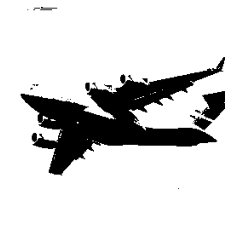

In [ ]:
image_grey = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
max_output_value = 255 
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY,
    neighborhood_size, subtract_from_mean) # 적응적 임계처리를 적용 #가중치 합을 적용
plt.imshow(image_binarized, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()
# cv2.ADAPTIVE_THRESH_MEAN_C를 적용합니다. 
image_mean_threshold = cv2.adaptiveThreshold(image_grey, max_output_value, cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size, subtract_from_mean)
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off") # 이미지를 출력 #이미지평균치 적용(평균치 이상: 하얀, 이하: 검정)
plt.show()

배경 제거  
• 이미지의 전경만 분리해내려면 원하는 전경 주위에 사각형 박스를 그리고 그랩컷 알고리즘을 실행합니다.   
• 그랩컷 - 사각형 밖에 있는 모든 것이 배경이라고 가정하고 이 정보를 사용하여 사각형 안에 있는 배경을 찾습니다.

In [ ]:
image_bgr = cv2.imread('plane_256x256.jpg') # 이미지 로드
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환
rectangle = (0, 56, 256, 150) # 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이
mask = np.zeros(image_rgb.shape[:2], np.uint8) # 초기 마스크를 만듭니다. 
bgdModel = np.zeros((1, 65), np.float64) # grabCut에 사용할 임시 배열을 만듭니다. 
fgdModel = np.zeros((1, 65), np.float64) # grabCut 실행

# cv2.grabCut(image_rgb, # 원본 이미지
# mask, # 마스크
# rectangle, # 사각형 크기지정
# bgdModel, # 배경을 위한 임시 배열
# fgdModel, # 전경을 위한 임시 배열
# 5, # 반복 횟수
# cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화


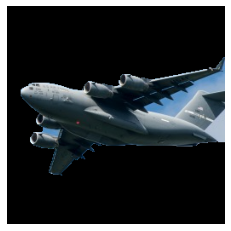

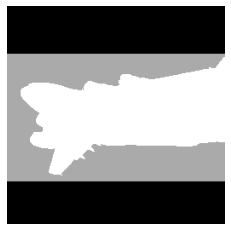

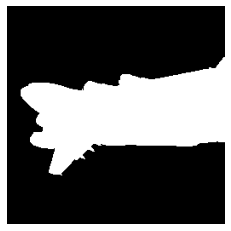

In [ ]:
# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다. (배경과 전경을 구분하는 마스크를 만듭니다)
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# 이미지에 새로운 마스크를 곱해 배경을 제외합니다. 
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off") # 이미지 출력
plt.show()
plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()
#검은색 영역은 배경이라고 확실하게 가정한 사각형의 바깥쪽 영역이며, 회색 영역은 그랩컷이 배경이라고 생각하는 영역이고 
#흰색 영역은 전경입니다.
#이 마스크를 사용하여 검은색과 회색 영역을 합친 두번째 마스크를 만듭니다. 
plt.imshow(mask_2, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

경계선 감지  

• 경계선 감지는 컴퓨터 비전의 주요 관심 대상이며 경계선은 많은 정보가 담긴 영역입니다.   

• 경계선 감지를 사용하여 정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있습니다.   

• 캐니(Canny) 경계선 감지기와 같은 경계선 감지 기술 사용 

• 캐니 감지기는 그레이디언트 임계값의 저점과 고점을 나타내는 두 매개변수가 필요합니다. 

• 낮은 임계값과 높은 임계값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주됩니다

• OpenCV의 Canny() : 낮은 임곗값과 높은 임곗값이 필수 매개변수입니다. 

• Canny를 전체 이미지 모음에 적용하기 전에 몇 개의 이미지를 테스트하여 낮은 임계값과 높은 임곗값의 적절한 쌍을 찾는 것이 좋은 결과를 만듭니다.

132.0
88
175
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<function matplotlib.pyplot.show>

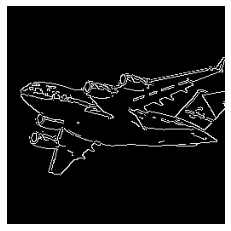

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_gray = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산
print(median_intensity)
# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다. 
# 낮은 임곗값과 높은 임곗값을 이미지 중간 픽셀 강도의 1표준편차 아래 값과 위 값으로 설정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
print(lower_threshold)
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
print(upper_threshold)
# 캐니 경계선 감지기를 적용합니다. 
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
print(image_canny)

plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show

모서리 감지

• 해리스 모서리 감지기는 두 개의 경계선이 교차하는 지점을 감지하는 방법으로 사용된다. (모서리는 정보가 많은 포인트) 

• 해리스 모서리 감지기는 윈도(이웃, 패치)안의 픽셀이 작은 움직임에도 크게 변하는 윈도를 찾습니다. 

• cornerHarris - 해리스 모서리 감지의 OpenCV 구현

• 매개변수 block_size : 각 픽셀에서 모서리 감지에 사용되는 이웃 픽셀 크기

• 매개변수 aperture : 사용하는 소벨 커널 크기

• 해리스 감지기와 유사한 방식으로 동작하는 Shi-Tomasi 모서리 감지기(goodFeaturesToTrack)을 사용하여 뚜렷하게 나타난 모서리를 지정된 개수만큼 찾아낼 수 있습니다. 

• goodFeaturesToTrack의 매개변수 - 감지할 모서리 개수, 모서리가 될 최소 품질(0에서 1사이), 모서리 사이의 최소 유클리드 거리

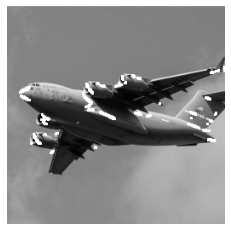

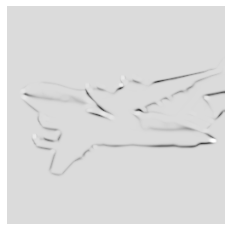

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread("plane_256x256.jpg") # 흑백 이미지 로드
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
block_size = 2 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킵니다. 

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다. 
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255] #흰색으로 표시
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변환
plt.imshow(image_gray, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

# 가능성이 높은 모서리를 출력합니다. 
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

39.0 133.0
39.0 161.0
27.0 110.0
100.0 102.0
238.0 109.0
136.0 88.0
239.0 78.0
126.0 132.0
235.0 155.0
179.0 114.0


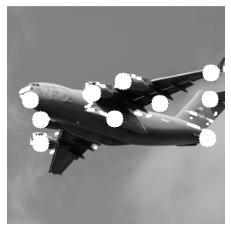

In [ ]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray, corners_to_detect, minimum_quality_score, minimum_distance) # 모서리를 감지
corners = np.float32(corners)

for corner in corners:
    x, y = corner[0]
    print(x,y)
    cv2.circle(image_bgr, (int(x),int(y)), 10, (255,255,255), -1) # 모서리마다 흰 원을 그립니다.

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백 이미지로 변환
plt.imshow(image_rgb, cmap='gray'), plt.axis("off") # 이미지를 출력
plt.show()

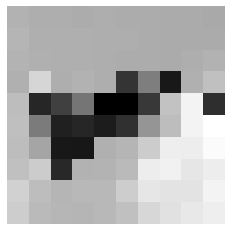

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10, 10)) # 이미지를 10x10 픽셀 크기로 변환
image_10x10.flatten() # 이미지 데이터를 1차원 벡터로 변환
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

머신러닝 특성 만들기  
• 넘파이의 flatten()을 사용하여 이미지를 머신러닝에 필요한 샘플로 변환할 수 있다.   
• flatten() - 이미지 데이터가 담긴 다차원 배열을 샘플값이 담긴 벡터로 변환  
• 이미지가 흑백일 때 각 픽셀은 하나의 값으로 표

In [ ]:
image_color = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR) 
image_color_10x10 = cv2.resize(image_color, (10, 10)) # 이미지를 10 × 10 픽셀 크기로 변환
image_color_10x10.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(300,)

In [ ]:
image_256x256_gray = cv2.imread("plane_256x256.jpg", cv2.IMREAD_GRAYSCALE) 
image_256x256_gray.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(65536,)

In [ ]:
image_256x256_color = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR) 
image_256x256_color.flatten().shape 

(196608,)

평균 색을 특성으로 인코딩  
• 이미지의 각 픽셀은 여러 컬러 채널(빨간, 초록, 파랑)의 조합으로 표현되며, 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 세 개의 컬럼 특성을 만듭니다.

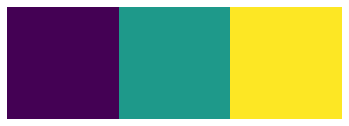

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# BGR 이미지로 로드
image_bgr = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR)
channels = cv2.mean(image_bgr) # 각 채널의 평균을 계산
# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다)
observation = np.array([(channels[2], channels[1], channels[0])]) 
observation # 채널 평균 값을 확인
plt.imshow(observation), plt.axis("off") # 이미지를 출력
plt.show()

In [ ]:
# 컬러 히스토그램을 특성으로 인코딩
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread("plane_256x256.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)# RGB로 변환
features = [] # 특성 값을 담을 리스트
colors = ("r","g","b") # 각 컬러 채널에 대해 히스토그램을 계산

# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
    [i], # 채널 인덱스
    None, # 마스크 없음
    [256], # 히스토그램 크기
    [0,256]) # 범위
features.extend(histogram) 

observation = np.array(features).flatten() # 샘플의 특성 값으로 벡터를 만듭니다. 
observation[0:5] 

array([0., 0., 0., 0., 0.], dtype=float32)

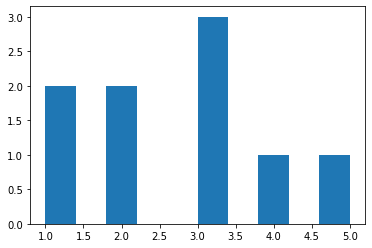

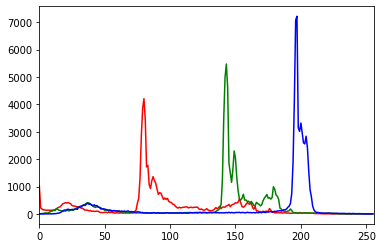

In [ ]:
image_rgb[0,0] # RGB 채널 값을 확인
import pandas as pd
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5]) # 예시 데이터
data.hist(grid=False) # 히스토그램을 출력
plt.show()

colors = ("r","g","b") # 각 컬러 채널에 대한 히스토그램을 계산
# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프를 그립니다. 
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
    [i], # 채널 인덱스
    None, # 마스크 없음
    [256], # 히스토그램 크기
    [0,256]) # 범위
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show() 

### 교차 검증
• 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측은 다른 데이터로 수행할 경우에는 예측 성능이 떨어지는 것  
• 교차 검증 : 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것  

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits() # 데이터셋 로드
features = digits.data # 특성 행렬을 만듭니다. 
target = digits.target # 타깃 벡터를 만듭니다. 

standardizer = StandardScaler() # 표준화 객체를 만듭니다. 
logit = LogisticRegression() # # 로지스틱 회귀 객체를 만듭니다
# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다. 
pipeline = make_pipeline(standardizer, logit)

kf = KFold(n_splits=10, shuffle=True, random_state=1) # k-폴드 교차검증을 만듭니다. (10 개의 폴드를 만듬)
# k-폴드 교차검증을 수행합니다. 
cv_results = cross_val_score(pipeline, features, target, cv=kf, # 교차 검증 기법
                                scoring="accuracy", # 평가 지표
                                n_jobs=-1) # 모든 CPU 코어 사용
print(cv_results.mean()) # 평균을 계산
print(cv_results) ## 10개 폴드의 점수를 모두 확인(평가 점수는 cv_results에 저장)

0.9693916821849783
[0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트를 만듭니다. 
features_train, features_test, target_train, target_test = train_test_split( features, target, test_size=0.1, random_state=1)
standardizer.fit(features_train) # 훈련 세트로 standardizer의 fit 메서드를 호출

# 훈련 세트와 테스트 세트에 모두 적용
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

pipelime = make_pipeline(standardizer, logit) #파이프라인을 만듭니다.
# k-폴드 교차검증을 수행합니다. 
cv_results = cross_val_score(pipeline, 
                             features, 
                             target, 
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
print(cv_results)

[0.97777778 0.98888889 0.96111111 0.94444444 0.97777778 0.98333333
 0.95555556 0.98882682 0.97765363 0.93854749]


StratifiedKFold 모델  
• 사이킷런의 pipeline 패키지는 교차검증 기법을 사용할 때 먼저 데이터를 전처리(standardizer)하고 모델  (로지스틱 회귀)을 훈련하는 규칙을 손쉽게 구현할 수 있도록 도와줍니다.   

• LOOCV(leave-one-out-cross-validation)는 폴드의 수k가 샘플의 개수와 같습니다. 

• cross_val_score의 cv는 교차검증 기법을 결정합니다.

• LOOCV는 LeaveOneOut 클래스에 구현되어 있습니다.

• LeaveOneOut 클래스는 KFold(n_splits=n)과 동일합니다. (n은 샘플 개수) 

• 계층별 교차 검증을 위한 StratifiedShuffleSplit

교차검증 모델

• KFold와 StratifiedKFold의 n_splits 매개변수 기본값은 3입니다 (사이킷런 0.22버전부터 기본값 5) 

• ShuffleSplit는 반복 횟수에 상관없이 훈련 폴드와 테스트 폴드 크기를 임의로 지정할 수 있습니다. 

• train_size, test_size 매개변수에는 사용할 샘플 개수 또는 비율을 입력합니다. 

• 반복마다 랜덤하게 분할하기 때문에 하나의 샘플이 여러 번 테스트 폴드에 포함될 수 있습니다.

학습을 시키지 않는다  
•Validation set: 모델을 update, 즉 학습을 시키진 않지만 학습에 '관여'  
Test set: 학습에 전혀 관여하지 않고 오직 '최종 성능'을 평가  


학습을 시킨다  
•Train set: 학습과 검증이 완료된 모델의 성능을 평가하기위한 dataset

In [ ]:
#훈련 폴드로 50%, 테스트 폴드로 20%를 사용하여 10번 반복하는 실습입니다. 
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다. 
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다. 
cv_results = cross_val_score(pipeline, # 파이프라인
                            features, # 특성 행렬
                            target, # 타깃 벡터
                            cv=ss, # 교차 검증 기법
                            scoring="accuracy", # 평가 지표
                            n_jobs=-1) # 모든 CPU 코어 사용
print(cv_results.mean()) # 평균을 계산합니다.
cv_results

0.9630555555555554


array([0.96111111, 0.98333333, 0.95555556, 0.96666667, 0.97777778,
       0.96666667, 0.95      , 0.95      , 0.95277778, 0.96666667])

In [ ]:
# 사이킷런에서 교차 검증을 반복하여 실행할 수 있는 RepeatedKFold 와 StratifiedRepeatedKFold
# n_splits 매개변수 기본값은 5이고 n_repeats 매개변수 기본값은 10입니다.
from sklearn.model_selection import RepeatedKFold
# RepeatedKFold 분할기를 만듭니다. 
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
# 교차검증을 수행합니다. 
cv_results = cross_val_score(pipeline, # 파이프라인
                                features, # 특성 행렬
                                target, # 타깃 벡터
                                cv=rfk, # 교차 검증 기법
                                scoring="accuracy", # 평가 지표
                                n_jobs=-1) # 모든 CPU 코어 사용
print(len(cv_results)) # 검증 점수 개수를 확인
print(cv_results)
print(cv_results.mean())

50
[0.97777778 0.97777778 0.96666667 0.95555556 0.97222222 0.96666667
 0.96666667 0.97206704 0.96648045 0.93296089 0.98888889 0.97777778
 0.97222222 0.97222222 0.95       0.96666667 0.96666667 0.98324022
 0.98324022 0.96648045 0.97777778 0.95       0.97222222 0.98888889
 0.97777778 0.95555556 0.95555556 0.98882682 0.97765363 0.96648045
 0.98333333 0.95555556 0.96111111 0.97777778 0.95555556 0.96111111
 0.97777778 0.97765363 0.96648045 0.96648045 0.97222222 0.97777778
 0.95555556 0.97222222 0.96111111 0.98888889 0.96111111 0.93296089
 0.98882682 0.98882682]
0.9695065176908755


### 기본 회귀 모델  
• 사이킷런의 DummyRegressor - 기본 모델로 사용할 간단한 더미 모델을 생성  
• DummyRegressor 클래스는 실제 모델과 비교하기 위해 사용할 수 있는 매우 간단한 모델을 생성  
strategy 매개변수 : 예측 방법을 지정.  
• 훈련 세트의 평균 또는 중간 값을 사용할 수 있습니다.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

boston = load_boston() # 데이터를 로드

features, target = boston.data, boston.target # 특성을 만듭니다.

features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0) # 흔련 세트와 테스트 세트를 나눕니다.

dummy = DummyRegressor(strategy='mean') # 더미 회귀 모델 생성.
dummy.fit(features_train, target_train) # 더미 회귀 모델을 훈련
dummy.score(features_test, target_test) # R^2 점수를 계산

-0.001119359203955339

### 이진 분류기의 예측 평가

• 사이킷런의 cross_val_score() - 교차검증을 수행할 때 scoring 매개변수에 성능 지표 중 하나를 선택할 수 있습니다. 

• TP는 진짜 양성 개수(양성 클래스 중에서 올바르게 예측한 샘플 개수) 

• TN은 진짜 음성 개수( 음성 클래스 중에서 올바르게 예측한 샘플 개수) 

• FP는 거짓 양성 개수( 양성 클래스로 예측한 것 중에서 실제 음성 클래스인 샘플 개수) 

• FN은 거짓 음성 개수(음성 클래스로 예측한 것 중에서 실제 양성 클래스인 샘플 개수)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                            n_features = 3,
                            n_informative = 3,
                            n_redundant = 0,
                            n_classes = 2,
                            random_state = 1)
logit = LogisticRegression() # 로지스틱 회귀 모델을 생성
cross_val_score(logit, X, y, scoring="accuracy") # 정확도를 사용하여 교차검증을 수행

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

이진 분류기의 예측 평가

• 정확도 : 예측한 샘플의 비율

• 정밀도 : 양성으로 예측한 샘플 중에서 진짜 양성 클래스의 비율(에측에 포함된 잡음) TP/(TP+FP)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다

• 재현율 : 진짜 양성 샘플 중에서 양성으로 예측한 비율 TP/(TP+FN)

재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다 (민감도, TPR)

• F1은 정밀도와 재현율의 조화 평균입니다.  
 F1 = 2*정밀도*재현율/(정밀도+재현율)

In [ ]:
# 정밀도를 사용한 교차검증
print(cross_val_score(logit, X, y, scoring="precision"))
# 재현율을 사용한 교차검증
print(cross_val_score(logit, X, y, scoring="recall"))
# f1 점수를 사용한 교차검증
print(cross_val_score(logit, X, y, scoring="f1"))

[0.95963673 0.94820717 0.9635996  0.96149949 0.96060606]
[0.951 0.952 0.953 0.949 0.951]
[0.95529884 0.9500998  0.95827049 0.95520886 0.95577889]


이진 분류기의 예측 평가  
#### ecall_score()
• 재현율이 중요 지표인 경우 - 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우    
 
#### precision_score() 
• 정밀도가 상대적으로 더 중요한 지표인 경우 - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게되면 업무상 큰 영향이 발생하는 경우  

#### predict_proba() - 개별 데이터별로 예측 확률을 반환
• 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)를 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다.   

• 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 됩니다.   
Positive 예측값이 많아지면 상대적으로 재현율 값이 높아집니다. 

####  precision_recall_curve() : 
정밀도와 재현율의 임계값의 변화에 따라 평가 지표 변화를 곡선 형태의 
그래프로 시각화하는데 이용

####  cross_val_score()  
cv 매개변수를 지정하지 않으면 회귀일 때는 KFold, 분류일 때는 StratifiedKFold 분할기가 사용됨

cv 매개변수에 정수를 입력하여 기본 분할기의 폴드 수를 지정할 수 있습니다. 

####  cross_validate() - scoring 매개변수에 여러 개의 평가 지표를 추가할 수 있다.

In [ ]:
#y값과 예측한 y값을 이용하여 직접 정확도와 재현율 계산
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 훈련 세트와 테스트 세트로 나눕니다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
y_hat = logit.fit(X_train, y_train).predict(X_test) # 테스트 세트의 예측 생성
# 정확도를 계산합니다. 
accuracy_score(y_test, y_hat)

from sklearn.model_selection import cross_validate
# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

{'fit_time': array([0.01908326, 0.0186336 , 0.01872993, 0.01869869, 0.02073026]),
 'score_time': array([0.00293326, 0.00277472, 0.00276446, 0.00324821, 0.00277138]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

이진 분류기 임계값 평가  
• ROC곡선 - 이진 분류기의 품질을 평가하는 데 널리 사용하는 방법  
확률 임곗값마다 진짜 양성과 거짓 양성 개수를 비교  
• roc_curve () - ROC 곡선으로 모델의 성능을 확인

분류 모델 평가  
• 분류: 범주형 변수가 어떤 곳에 속할지를 예측
예] 암환자 판단, 스팸메일 분류, 사진으로 호랑이 토끼 예측  
• 정확도: 전체의 데이터 중에서 올바르게 예측한 비율  
• 라벨이 불균형할때 정확도만으로 모델의 성능을 평가하는 것은 위험하다  
예] 전체 데이터의 90%는 토끼, 10%는 호랑인 경우, 모두 토끼라고 예측한다면, 정확도는 90%  

• confusion matrix ( 오차행렬 )  
• 어떤 예측오류가 얼마나 발생하는지도 알 수 있다

#### Accuracy ( 정확도 ) - 전체 데이터 중 올바르게 예측한 비율  
• TP + TN / (TP + FN + FP + TN)   
• 예측하려고 하는 종속변수의 비율이 불균형할때 가치가 낮아집니다.  
• 1에 가까울 수록 좋다.    
• Accuracy는 bias에 관해 단점을 가진다

#### Recall ( 재현율 ) - 실제 true 중 예측 true의 비율  
• 예측 true / 실제 true = TP / (TP + FN)  
• sensitivity 또는 hit rate라고도 불리고 1에 가까울 수록 좋다.  
• 재현율이 중요한 경우는 실제 True를 False로 잘못판단하면 큰일나는 경우(즉, True가 중요한 경우)


#### precision ( 정밀도 ) - 예측 true 중 실제 true의 비율  
• 실제 true / 예측 true = TP / (TP + FP)  
• 재현율이 중요한 경우는 실제 False를 True라고 판단하면 안되는 경우 (즉, False가 중요한 경우)  
• PPV(Positive Predictive Value)라고도 불리고 1에 가까울 수록 좋다.  


#### F1 Score - 재현율과 정밀도의 조화평균  
• 한쪽으로 치우치면 F1 Score의 값이 낮게 나옵니다.  
• 재현율과 정밀도는 한쪽이 높아지면, 다른쪽이 낮아지는 관계 ( Trade-off 관계) 입니다. 만약, 재현율이 중요해서
높이려고 한다면, 정밀도가 낮아지게 됩니다.  


#### ROC curve - FPR (False Positive Rate)이 변할 때 TPR (True Positive Rate) 이 어떻게 변하는지를 나타내는 곡선  
• TPR 민감도 - 재현율과 같고, TPR = TP / (TP + FN)  
• FPR = FP / (FP + TN)  
• 임계값 (Threshold) 가 1이면 확률이 1일때만 True 라고 예측하기 때문에 FP (실제 False인데 True라고 예측하는 경
우) 가 0입니다.  
• 임계값 (Threshold) 가 0이면 확률이 모두 True 라고 예측하기 때문에 TN (실제 False인데 False 라고 예측하는 경우) 가 0입니다.  
• 임계값을 1~0으로 거꾸로 조절하면서 그때마다 FPR에 따른 TPR을 계산후 곡선을 그립니다.  
• AUC - ROC 커브의 아래 면적을 의미, 랜덤일때 0.5의 값을 가집니다. 따라서, 0.5미만은 의미 없는 모형이라고 판단합니다. 1에 가까울수록 좋은 모형이라고 판단합니다.

In [ ]:
###################분류 모델 평가 지표 ###############################
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

logit = LogisticRegression() # 로지스틱 회귀 모델을 만듭니다
acc =cross_val_score(logit, X, y, scoring="accuracy") # 정확도를 사용하여 교차검증을 수행합니다
print(acc)
# 정밀도를 사용한 교차검증
prec = cross_val_score(logit, X, y, scoring="precision")
print(prec)
# 재현율을 사용한 교차검증
rec=cross_val_score(logit, X, y, scoring="recall")
print(rec)
# f1 점수를 사용한 교차검증
fone = cross_val_score(logit, X, y, scoring="f1")
print(fone)


#y값과 예측한 y값을 이용하여 직접 정확도와 재현율 계산
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

[0.9555 0.95   0.9585 0.9555 0.956 ]
[0.95963673 0.94820717 0.9635996  0.96149949 0.96060606]
[0.951 0.952 0.953 0.949 0.951]
[0.95529884 0.9500998  0.95827049 0.95520886 0.95577889]


In [ ]:
#y값과 예측한 y값을 이용하여 직접 정확도와 재현율 계산
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# 테스트 세트의 예측을 만듭니다.
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_test, y_hat)

 
from sklearn.model_selection import cross_validate
# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

{'fit_time': array([0.01914382, 0.01840615, 0.01837277, 0.01828504, 0.01835728]),
 'score_time': array([0.00288844, 0.00272608, 0.00274014, 0.00271606, 0.00269222]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

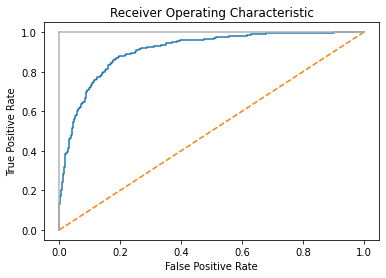

In [ ]:
##########################이진 분류  임계값 평가################################
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=3, random_state=3)

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

logit = LogisticRegression() # 분류기를 만듭니다.
logit.fit(features_train, target_train) # 모델을 훈련합니다.

# 예측 확률 계산
target_probabilities = logit.predict_proba(features_test)[:,1]
# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [ ]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]
logit.classes_

print("임계값:", threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])

print("임계값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

임계값: 0.5331715230155316
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725
임계값: 0.8189133876659292
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


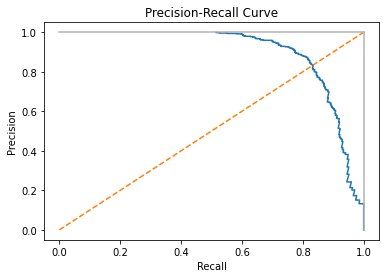

In [ ]:
# ROC 곡선 아래 면적을 계산합니다.
roc_auc_score(target_test, target_probabilities)

from sklearn.metrics import precision_recall_curve
# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
precision, recall, threshold = precision_recall_curve(target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [ ]:
from sklearn.metrics import average_precision_score
# 평균 정밀도를 계산합니다.
average_precision_score(target_test, target_probabilities)
#scoring매개변수에 ROCAUC와 평균 정밀도를 평가 지표로 지정 할 수 있습니다.
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

{'fit_time': array([0.01818275, 0.01915359, 0.01741791, 0.01877499, 0.01846862]),
 'score_time': array([0.00378823, 0.003829  , 0.00364637, 0.00368404, 0.00369143]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ])}

In [ ]:
#############다중 클래스 분류 모델 평가 #############################

features, target = make_classification(n_samples = 10000,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       random_state = 1)

logit = LogisticRegression() 
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [ ]:
########iris 데이터 세트를 분류 분석 수행, 모델을 오차 행렬로 평가 #############
from sklearn.metrics import confusion_matrix
iris = datasets.load_iris() # 데이터 로드
features = iris.data # 특성 행렬
target = iris.target # 타깃 벡터
class_names = iris.target_names # 클래스 이름 리스트

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


            setosa  versicolor  virginica
setosa          13           0          0
versicolor       0          15          1
virginica        0           0          9


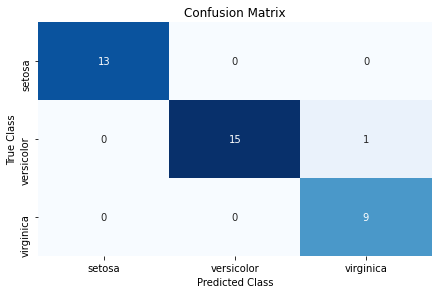

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성
#데이터로부터 학습된 모델 생성
target_predicted = classifier.fit(features_train, target_train).predict(features_test)
# 오차 행렬 행렬 생성
matrix = confusion_matrix(target_test, target_predicted)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
print(dataframe)
import seaborn as sns
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues") # 히트맵 생성
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### 회귀 모형 평가 지표
• 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이를 기반으로 함  

• 회귀 평가지표 MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 회귀 성능이 좋음.  

• 값이 작을수록 예측값과 실제값의 차이가 없다는 뜻이기 때문입니다. 반면, R² 는 값이 클수록 성능이 좋음


#### MAE: Mean Absolute Error 잔차의 절댓값에 대한 평균

• 지표 자체가 직관적이며 예측변수와 단위가 같다.

예) 기온을 예측하는 모델의 MAE가 3이라면 이 모델은 평균적으로 3도 정도를 잘못 예측하는 것임

• 잔차에 절댓값을 씌우기 때문에 실제 값에 대해 underestimates or overestimates 인지 파악하기 힘들다.

• 스케일에 의존적이다. (MAE, MSE, RMSE와 동일)

#### MSE: Mean Square Error 잔차의 제곱에 대한 평균

• 지표 자체가 직관적이다.

• 예측 변수와 단위가 다르다.

• 스케일에 의존적이다. (MAE, MSE, RMSE와 동일)

• 잔차를 제곱하기 때문에 이상치에 민감하다.

• 잔차를 제곱하기 때문에, 1미만의 에러는 더 작아지고, 그 이상의 에러는 더 커진다.

• 잔차 값에 대한 제곱을 구하기 때문에(=넓이) 큰 값에 대해 벌점이 크게 매겨진다. (MSE값은 항상 MAE보다 크다.)

• 실제 값에 대해 underestimates or overestimates 인지 파악하기 힘들다.

#### RMSE: Root Mean Square Error 잔차의 제곱에 대한 평균 값에 루트를 씌운 것  

• 지표 자체가 직관적이며 예측변수와 단위가 같다.

• 잔차를 제곱하기 때문에 이상치에 민감하다.

• 제곱된 잔차를 다시 루트로 풀어주기 때문에 잔차를 제곱해서 생기는 값의 왜곡이 MSE에 비해 좀 덜하다.

• 실제 값에 대해 underestimates or overestimates 인지 파악하기 힘들다.

• 스케일에 의존적이다. (MAE, MSE, RMSE와 동일)

#### MAPE: Mean Absolute Percentage Error MAE를 비율(%)로 표현한 것

• 지표 자체가 직관적이다.

• 비율 변수이기 때문에 MAE, MSE, RMSE에 비해 비교에 용이하다.

• 실제 값에 대해 underestimates or overestimates 인지 파악하기 힘들다.

• 비율로 해석이 의미있는 값에만 적용할 수 있다.
• ex) 기온을 예측하는 모델의 경우 MAPE로 해석하기 힘들다.

• 실제 값에 0이 포함될 경우 MAPE를 계산할 수 없다.  
• 예) 10분 간격으로 서울시의 따릉이 수요를 예측하는 경우 10분의 interval 동안
수요가 0인 구간이 존재한다면 MAPE는 zero-division error를 반환한다.

#### MPE: Mean Percentage Error MAPE에서 절댓값을 제외한 지표

• 실제 값에 대해 underestimates or overestimates 인지 파악할 수 있다.

• MPE > 0: underperformance (underestimates)

• MPE < 0: overperformance (overestimates)

• 지표 자체가 직관적이지 않으며 예측변수와 단위가 다르다.

#### MSLE (Mean Squared Log Error) MSE에 로그를 적용해준 지표  
• log(y)가 아니라 log(y+1)입니다. y=0일 때, log(y)는 마이너스 무한대이므로 이를 보정해주기 위해 +1을 한 것

#### RMSLE (Root Mean Squared Log Error) RMSE에 로그를 적용해준 지표

• 아웃라이어에 robust 하다. RMSLE는 아웃라이어가 있더라도 값의 변동폭이 크지 않다.

• 상대적 Error를 측정해준다. RMSE와 달리 RMSLE는 예측값과 실제값의 상대적 Error를 측정해준다.

• Under Estimation에 큰 패널티를 부여한다. 즉, 예측값이 실제값보다 작을 때 패널티 부여

#### R² (R Sqaure)
• R² 는 분산 기반으로 예측 성능을 평가합니다.

• 1에 가까울수록 예측 정확도가 높습니다.

• R² = 예측값 Variance / 실제값 Variance

• 상대적으로 얼마나 성능이 나오는지를 측정한 지표

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

origin = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7])
pred = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7])

MAE = mean_absolute_error(origin, pred) # 잔차의 절댓값에 대한 평균
MSE = mean_squared_error(origin, pred) # 잔차의 제곱에 대한 평균
RMSE = np.sqrt(MSE)  # 잔차의 제곱에 대한 평균 값에 루트를 씌운 것
MSLE = mean_squared_log_error(origin, pred)  # MSE에 로그를 적용해준 지표
RMSLE = np.sqrt(mean_squared_log_error(origin, pred))  # RMSE에 로그를 적용해준 지표
R2 = r2_score(origin, pred) # 분산 기반으로 예측 성능을 평가


print("MAE", MAE)
print("MSE", MSE)
print("RMSE", RMSE)
print("MSLE", MSLE)
print("RMSLE", RMSLE)
print("R2", R2)

MAE 0.45454545454545453
MSE 0.45454545454545453
RMSE 0.674199862463242
MSLE 0.029272467607503513
RMSLE 0.1710919858073531
R2 0.868421052631579


In [ ]:
from sklearn.datasets import make_regression 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression 

# 특성 행렬과 타깃 벡터를 만듭니다. 
features, target = make_regression(n_samples = 100, 
                                   n_features = 3, 
                                   n_informative = 3, 
                                   n_targets = 1, 
                                   noise = 50, 
                                   coef = False, 
                                   random_state = 1) 
ols = LinearRegression() #객체 생성 

# 음의 MSE를 사용한 교차검증을 수행합니다. 
print(cross_val_score(ols, features, target, scoring='neg_mean_squared_error'))

# R^2를 사용한 교차검증을 수행합니다. 
print(cross_val_score(ols, features, target, scoring='r2'))

[-1974.65337976 -2004.54137625 -3935.19355723 -1060.04361386
 -1598.74104702]
[0.8622399  0.85838075 0.74723548 0.91354743 0.84469331]


### 군집(클러스터링) 평가 지표
외부 평가(External Evaluation) - 이미 정해진 정답을 바탕으로 얼마나 클러스터링 알고리즘의 정확도가 높은지
를 판별하는 방법

• 자카드 지수 - 두 데이터 집합 간의 유사도를 계산하는데 사용되며 최소값은 0 최대값은 1입니다.  
1은 100%동일, 0은 완전히 서로 다른 데이터를 의미합니다.

내부 평가(Internal Evaluation) - 적절한 군집(클러스터링) 개수를 결정하는데 도움을 주는 방법

#### Dunn index - 묶음 or 군집간의 최소거리 및 최대 거리의 비율로 계산

• 군집 간 거리가 멀면 멀수록 군집 내부의 분산값이 작을수록 군집화 or 클러스터링 or 묶음이 잘 된 결과라고 볼 수 있다

• 높은 수치를 가진 클러스터링 알고리즘이 잘된 것으로 평가

• d(I, j)는 클러스터 간의 거리를 나타내며 d(k)는 k 군집 or 클러스터 내부에서의 거리를 계산

• 분자는 군집 간 거리의 최소값이며 분모는 군집 내에서 거리의 최대값이라고 볼 수 있다

#### Ellbow Method - elbow 모습을 나타내는 곳의 값이 K값(클러스터링, 군집 개수)로 지정 될 수 있음을 의미하는 방법


• 클러스터 내의 샘플 간의 거리는 가깝고(조밀한 클러스터) 클러스터 간 거리는 먼것(잘 구분된 클러스터)이 좋은 클러스터라고 생각할 수 있습니다.

• 실루엣 계수는 클러스터 내 샘플 간의 거리와 클러스터 간 거리 두 특성을 측정한 하나의 수치를 제공합니다. 

• silhouette_score 함수의 반환값은 모든 샘플의 실루엣 계수를 평균한 값입니다. 

• 실루엣 계수의 범위는 -1과 1 사이입니다.

• 1은 조밀하고 잘 구분되는 클러스터를 의미합니다.

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1) # 특성 행렬을 생성
                         
# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)

target_predicted = model.labels_ # 예측된 클래스
#print(target_predicted)

silhouette_score(features, target_predicted) # 모델 평가

0.8916265564072142